In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import sklearn

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.datasets import load_iris

In [34]:
from sklearn.tree import plot_tree

In [35]:
os.chdir("C:\\Users\\Particle\\OneDrive\\Desktop\\devp")

In [36]:
df = pd.read_csv("income_evaluation.csv")

In [37]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [39]:
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [40]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [41]:
df['workclass'].value_counts()


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [42]:
income = df.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

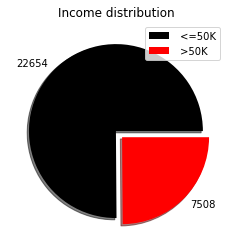

In [43]:
colors = ['Black', 'Red']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [44]:
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)


In [45]:
df.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [46]:
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

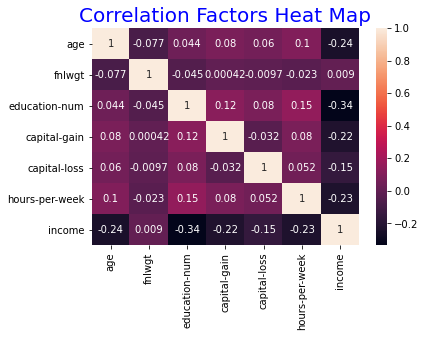

In [47]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='blue', size='20')

In [48]:
df_final = pd.get_dummies(df)
df_final.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [49]:
x = df_final.drop(columns=['income'])
y = df_final['income']

In [50]:
ss = StandardScaler()

In [51]:
ss.fit(x)

StandardScaler()

In [54]:
x = ss.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [56]:
ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None      
           )

_=ct.fit(x_train,y_train)

In [57]:
y_te = ct.predict(x_test)
np.sum((y_test == y_te))/y_test.size

0.8130097473642331

In [58]:
fi = ct.feature_importances_
fi

array([1.46699753e-01, 1.50823172e-01, 8.99620306e-02, 1.12843616e-01,
       3.91901443e-02, 7.03987612e-02, 6.30970783e-03, 7.30802199e-03,
       1.23803631e-02, 5.73003609e-03, 8.04136288e-03, 5.03467099e-03,
       0.00000000e+00, 6.27860591e-04, 6.20381447e-04, 5.38620951e-05,
       1.64458881e-04, 3.37463615e-04, 7.58340783e-04, 3.39028122e-04,
       1.21533236e-03, 2.24642717e-03, 1.29160413e-03, 7.93651039e-04,
       1.97540513e-03, 2.15215944e-04, 0.00000000e+00, 4.01179718e-04,
       1.67853689e-03, 2.57886817e-03, 7.61222884e-04, 1.87623763e-01,
       2.66843785e-04, 1.10413434e-03, 9.46804082e-04, 1.96508524e-03,
       6.41978425e-03, 0.00000000e+00, 1.08040325e-02, 9.93593140e-03,
       4.94382770e-03, 3.55213195e-03, 5.36477223e-03, 4.77456483e-03,
       0.00000000e+00, 8.60637510e-03, 4.47422482e-03, 9.67478110e-03,
       5.11101780e-03, 7.27968717e-03, 3.14658451e-03, 2.16576777e-03,
       4.05391732e-04, 3.34447260e-03, 3.50085954e-03, 3.83274238e-03,
      

list(zip(df.columns, fi))


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf=RandomForestClassifier(n_estimators=100)

#Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)



In [62]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8488827000862011


Accuracy scores
Decision Tree= 80%
Random Forest= ~85%
`